# Project Title

## Motivation

### Dataset
What is your dataset?
Why did you choose this/these particular dataset(s)?

The main datasets used in this project are a Covid-19 death count dataset and a country response dataset. 

__TODO__ Discussion on why chosen

#### The Covid-19 Death Count Dataset
The Covid-19 death count dataset contains the death count for 266 provinces/states in 212 different countries with one entry per date from the 22'nd of January and is updated daily with the newest data (at the time of writing this). 

__TODO__ source etc. 


#### The Government Response Dataset 

__TODO__ description referencing the report (https://www.bsg.ox.ac.uk/sites/default/files/2020-05/BSG-WP-2020-032-v5.0_0.pdf)

__TODO__ source 

__TODO__ etc

#### Other Datasets Used
A few additional datasets are also used to enrich the visualizations and data analysis. 

- Geo data
- Confirmed cases data
- Population data

__TODO__ short description

__TODO__ source 

### Goal
What was your goal for the end user's experience?
Note: Vi vil give brugeren et overblik over (sammenhængen mellem) countermeasures og dødstal. 

__TODO__ 

## Basic stats
### Preprocessing

The following describes how the data is prepared for exploration and analysis.

#### Confirmed Cases

Dataset containing total confirmed cases for a number of countries with one entry per date starting on the 22'nd of January. 

Dataset is downloaded from https://data.humdata.org/dataset/5dff64bc-a671-48da-aa87-2ca40d7abf02 (accessed 5/13/20). 

Title on webpage: time_series_covid19_confirmed_global_iso3_regions.csv

First the data is read and stored in a dataframe. Only the relevant columns are selected. 

In [1]:
import pandas as pd 
#Confirmed cases datafile
datafile = '../data/time_series_covid19_confirmed_global_iso3_regions.csv'
#Read using pandas. Only include relevant columns
confirmed_df = pd.read_csv(datafile,usecols = lambda column : column not in ['Lat', 'Long','Region Code', 'Region Name', 'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code','Intermediate Region Name'])
#Rename column for consistency
confirmed_df = confirmed_df.rename(columns={"ISO 3166-1 Alpha 3-Codes": "country_code"})
confirmed_df.drop(0, inplace = True)
confirmed_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,country_code
1,NaN,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0,AFG
2,NaN,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0,ALB
3,NaN,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4648.0,4838.0,4997.0,5182.0,5369.0,5558.0,5723.0,5891.0,6067.0,DZA
4,NaN,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,750.0,751.0,751.0,752.0,752.0,754.0,755.0,755.0,758.0,AND
5,NaN,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0,AGO


The count per country is is calculated and saved. For some countries the count has been entered for individual provinces or states, but for this project only the total count for each country is needed, therefore the data is grouped by country and summed to get the count for each country.

In [2]:
confirmed_df = confirmed_df.groupby(['country_code']).sum().reset_index()

In [3]:
confirmed_df.head()

,country_code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2704.0,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0
3,AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,795.0,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0


#### Geo Data
The geo file is needed for drawing the map. The data is downloaded from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/ (accessed 5/1/20). 

It is read using geopandas and modified for better usability.

In [4]:
import geopandas as gpd

#Shape file
shapefile = '../data/geo_data/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas. Only take the columns needed
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns
gdf.columns = ['country', 'country_code', 'geometry']
#Remove antartica because it is irrelevant and takes up a lot of space
gdf = gdf.drop(gdf.index[159]) 
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


#### Death count
Death count data is downloaded from https://data.humdata.org/dataset/5dff64bc-a671-48da-aa87-2ca40d7abf02 (accessed 5/13/20).

The death count file is read using pandas and also modified for better usability.

In [37]:
#Death count datafile
datafile = '../data/time_series_covid19_deaths_global_iso3_regions.csv'
#Read using pandas. Only include relevant columns
deaths_df = pd.read_csv(datafile,usecols = lambda column : column not in ['Region Code', 'Region Name', 'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code','Intermediate Region Name'])
#Rename column for consistency
deaths_df = deaths_df.rename(columns={"ISO 3166-1 Alpha 3-Codes": "country_code"})
deaths_df = deaths_df.rename(columns={"Country/Region": "country"})
deaths_df.drop(0, inplace = True)
deaths_df.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,country_code
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,AFG
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,ALB
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,465.0,470.0,476.0,483.0,488.0,494.0,502.0,507.0,515.0,DZA
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,46.0,46.0,47.0,47.0,48.0,48.0,48.0,48.0,AND
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AGO


First the total number of dead is saved in a separate dataframe.

In [38]:
#Sum date columns and save to a new dataframe
global_dead_df = deaths_df.sum(numeric_only=True).reset_index()

In [39]:
#Rename columns
global_dead_df.columns=['date', 'dead']

In [40]:
global_dead_df.head()

,date,dead
0,1/22/20,17.0
1,1/23/20,18.0
2,1/24/20,26.0
3,1/25/20,42.0
4,1/26/20,56.0


Then the death count per country is is calculated and saved. For some countries the death count has been entered for individual provinces or states, therefore the data is grouped by country and summed to get the count for each country.

In [41]:
deaths_df.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,country_code
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,AFG
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,ALB
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,465.0,470.0,476.0,483.0,488.0,494.0,502.0,507.0,515.0,DZA
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,46.0,46.0,47.0,47.0,48.0,48.0,48.0,48.0,AND
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AGO


In [42]:
country_total_df = deaths_df.groupby(['country_code','country']).sum().reset_index()

In [43]:
country_total_df.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0


#### Government Responses Dataset
The government responses dataset or countermeasures dataset is downloaded from https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker (accessed 5/13/20). The 'timeseries' form is used. The dataset is comprised of multiple sheets, one for each countermeasure.

First the data is read and saved in a dictionary.

In [44]:
countermeasure_dfs = pd.read_excel('../data/OxCGRT_timeseries_all.xlsx', sheet_name=None)

A helper method is defined to convert dates to the same format as in the other datasets. 

In [45]:
def convertDate(date): 
    #do nothing if it is one of the two special columns
    if (date =='CountryName' or date =='CountryCode'): return date
    # convert e.g. 22jan2020 into 1/22/20
    s = str(date)
    day = str(int(s[0:2]))
    month = s[2:5]
   
    switcher = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5
    }
    month = str(switcher[month])
    year = s[7:9]
    
    return month + '/' + day + '/' + year


The dataframes are formatted for better usability. The date is converted using the helper method defined above and the the country code column is renamed for consistency. 

In [46]:
#Each dataframe is formatted
for key in countermeasure_dfs.keys():
    #Convert date
    countermeasure_dfs[key].columns =  countermeasure_dfs[key].columns.to_series().apply(convertDate)
    #Rename column
    countermeasure_dfs[key] = countermeasure_dfs[key].rename(columns={"CountryCode": "country_code"})
    countermeasure_dfs[key] = countermeasure_dfs[key].rename(columns={"CountryName": "country"})
    

Take a look at one of the dataframes

In [47]:
countermeasure_dfs['c1_schoolclosing'].head()

,country,country_code,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
2,Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
3,Albania,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN


#### Population
To be able to show dead per million, the population count for each country is needed. 

The dataset is downloaded from: https://data.worldbank.org/indicator/sp.pop.totl (accessed 13/5/20).

In [48]:
#Population datafile
datafile = '../data/population.csv'
#Read using pandas. Only include relevant columns
population = pd.read_csv(datafile,header=2, usecols = lambda column : column in ['Country Code', '2018'])
#Rename columns
population.columns=['country_code', 'population']

Add population info to country death count dataframe by merging population with dataframe.

In [49]:
#Merge on contry code
country_total_df_with_population = country_total_df.merge(population, on = 'country_code', how = 'left').reset_index(drop=True)
country_total_df_with_population.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,105845.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,37172386.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30809762.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,2866376.0


The population is missing for some countries. The following lists all rows with missing population.

In [50]:
#List rows with missing population
country_total_df_with_population[country_total_df_with_population['population'].isna()]

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
16,BES,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
23,BLM,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
59,ERI,Eritrea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
60,ESH,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66,FLK,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75,GLP,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,NaN
83,GUF,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
135,MSR,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
136,MTQ,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,NaN


The population count is missing for 17 of the countries in the death count dataset. Since there are only 17 missing values these are added manually. The population for every country but two is found on www.worldometers.info. The sources for the other two are listed below.

AIA Anguilla: 14,731

BES Caribbean Netherlands: 25,987 (source https://en.wikipedia.org/wiki/Caribbean_Netherlands)

BLM Saint Barthélemy 9,793 (source https://en.wikipedia.org/wiki/Saint_Barth%C3%A9lemy)

ESH Western Sahara: 567,402

FLK Falkland Islands: 3,234

GLP Guadeloupe: 400,124

GUF French Guiana: 298,682

MSR Montserrat: 4,992

MTQ Martinique: 375,265

MYT Mayotte: 272,815 (source https://en.wikipedia.org/wiki/Mayotte)

REU Réunion: 859,959 (source https://en.wikipedia.org/wiki/R%C3%A9union)

SPM Saint Pierre and Miquelon: 6,008 (source https://en.wikipedia.org/wiki/Saint_Pierre_and_Miquelon)


TWN Taiwan: 23,726,460

ERI Eritrea: 3,457,786

VAT Holy See: 801

RKS Kosovo: 1,797,086 (source: https://en.wikipedia.org/wiki/Demographics_of_Kosovo)




The population is added manually by index.

In [51]:
#Set population value for the missing countries
country_total_df_with_population.at[3,'population'] = 14731
country_total_df_with_population.at[16,'population'] = 25987 
country_total_df_with_population.at[23,'population'] = 9793
country_total_df_with_population.at[59,'population'] = 3457786
country_total_df_with_population.at[60,'population'] = 567402
country_total_df_with_population.at[66,'population'] = 3234
country_total_df_with_population.at[75,'population'] = 400124
country_total_df_with_population.at[83,'population'] = 298682
country_total_df_with_population.at[135,'population'] = 4992
country_total_df_with_population.at[136,'population'] = 375265
country_total_df_with_population.at[140,'population'] = 272815
country_total_df_with_population.at[162,'population'] = 859959
country_total_df_with_population.at[163,'population'] = 1797086 
country_total_df_with_population.at[175,'population'] = 6008
country_total_df_with_population.at[196,'population'] = 23726460
country_total_df_with_population.at[203,'population'] = 801

A final check to ensure that there are no missing values.

In [52]:
country_total_df_with_population[country_total_df_with_population['population'].isna()]

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population


In [53]:
country_total_df_with_population.isnull().values.any()

False

The dataframe is now complete. 

#### Dataframe with dead per million
To make it easier to work with a separate dataframe is created where the death count is listed as number of dead per million instead of total number of dead. 

First a list of the relevant columns is created. These are all the date columns. There are a few special columns that do not contain other values for the countries than dead count. These are the columns: country, country code, geometry and the newly added population. 

In [54]:
#List special columns
special_columns = ['country', 'country_code', 'geometry', 'population']
#List date columns by taking every column that is not in the other list
date_columns = [x for x in country_total_df_with_population.columns if x not in special_columns]

The new dataframe is created by dividing by population divided with a million. There are some 'no data' values which must be skipped and there are some countries with a population of zero witch must also be skipped. 

In [55]:
#Copy the country total dataframe
dead_per_million_df = country_total_df_with_population.copy()
for date in date_columns: 
    #Convert column to numeric
    dead_per_million_df[date]= pd.to_numeric(dead_per_million_df[date], errors='coerce')
    #Calculate dead per million
    dead_per_million_df[date] = (dead_per_million_df[date]/((country_total_df_with_population['population'])/1000000)).where(not(isinstance(country_total_df_with_population[date], str) ) and (country_total_df_with_population['population']>0), dead_per_million_df[date])


Take a look at the new dataframe. 

In [56]:
dead_per_million_df.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.895555,18.895555,18.895555,28.343332,28.343332,28.343332,28.343332,28.343332,28.343332,105845.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.421152,2.555661,2.797776,2.851579,2.932284,3.093694,3.228203,3.282006,3.416515,37172386.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,30809762.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14731.0
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,2866376.0



### Data Exploration
Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.


### Death Count Data
In the following the initial processing and exploration of the death count dataset is done.

There are two dataframes: one with global death count and one with death count per country. 

The global death count dataset contains only two columns: date and number of dead. 

In [57]:
global_dead_df.head()

,date,dead
0,1/22/20,17.0
1,1/23/20,18.0
2,1/24/20,26.0
3,1/25/20,42.0
4,1/26/20,56.0


In [58]:
global_dead_df.shape

(112, 2)

There are 112 rows i.e. 112 dates in the dataset. 

The dataframe is plotted using a line plot to get an overview of the data. 

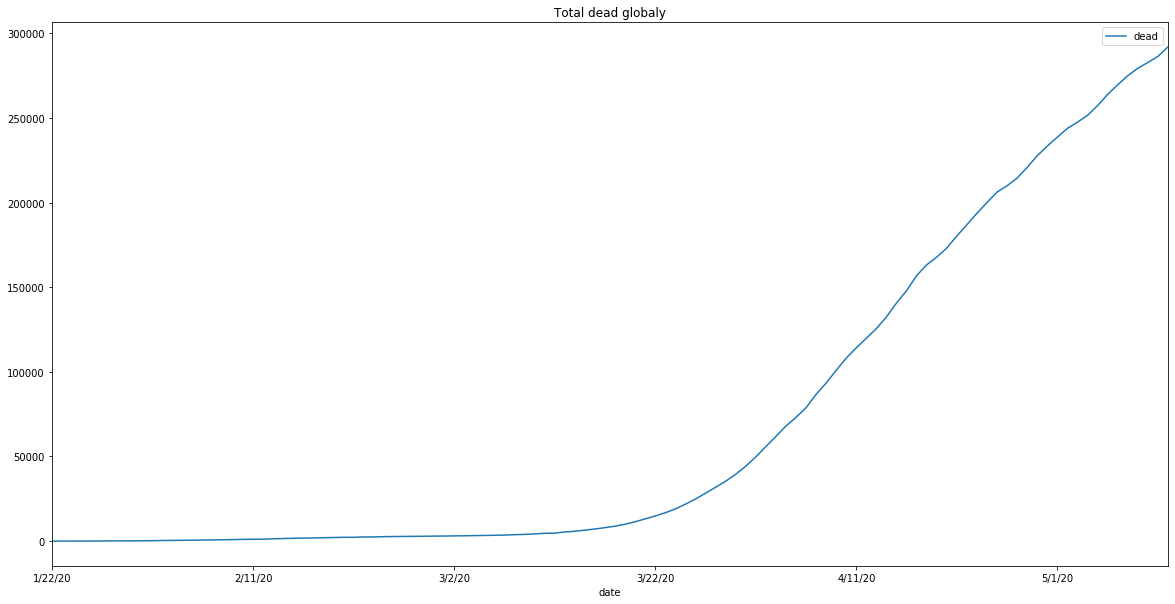

In [59]:
import matplotlib.pyplot as plt
global_dead_df.plot.line(title='Total dead globaly', x = 'date', y='dead', figsize=(20,10))

The death count is nearly 0 until around the 20'th of March where it really takes of and grows steadily.

Looking at the other dataset containing data for each country gives us an overview of how many have died in each country.

In [60]:
country_total_df.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0


In [61]:
country_total_df.shape

(212, 114)

There is one row for each country. The first two columns indicate which country it is: one containing the ISO 3166-1 Alpha 3 code for the country and one containing the country name. The rest of the columns are date columns ranging from 1/22 to 5/12. There is a total of 212 countries and a total of 112 date columns. 

To get an overview of the data the newest death count for each country is visualized using a bar plot. 

In [62]:
#Take newest column which is the last column in the dataframe
newest = country_total_df.iloc[:,[1,-1]]
#Rename columns
newest.columns=['country','dead']


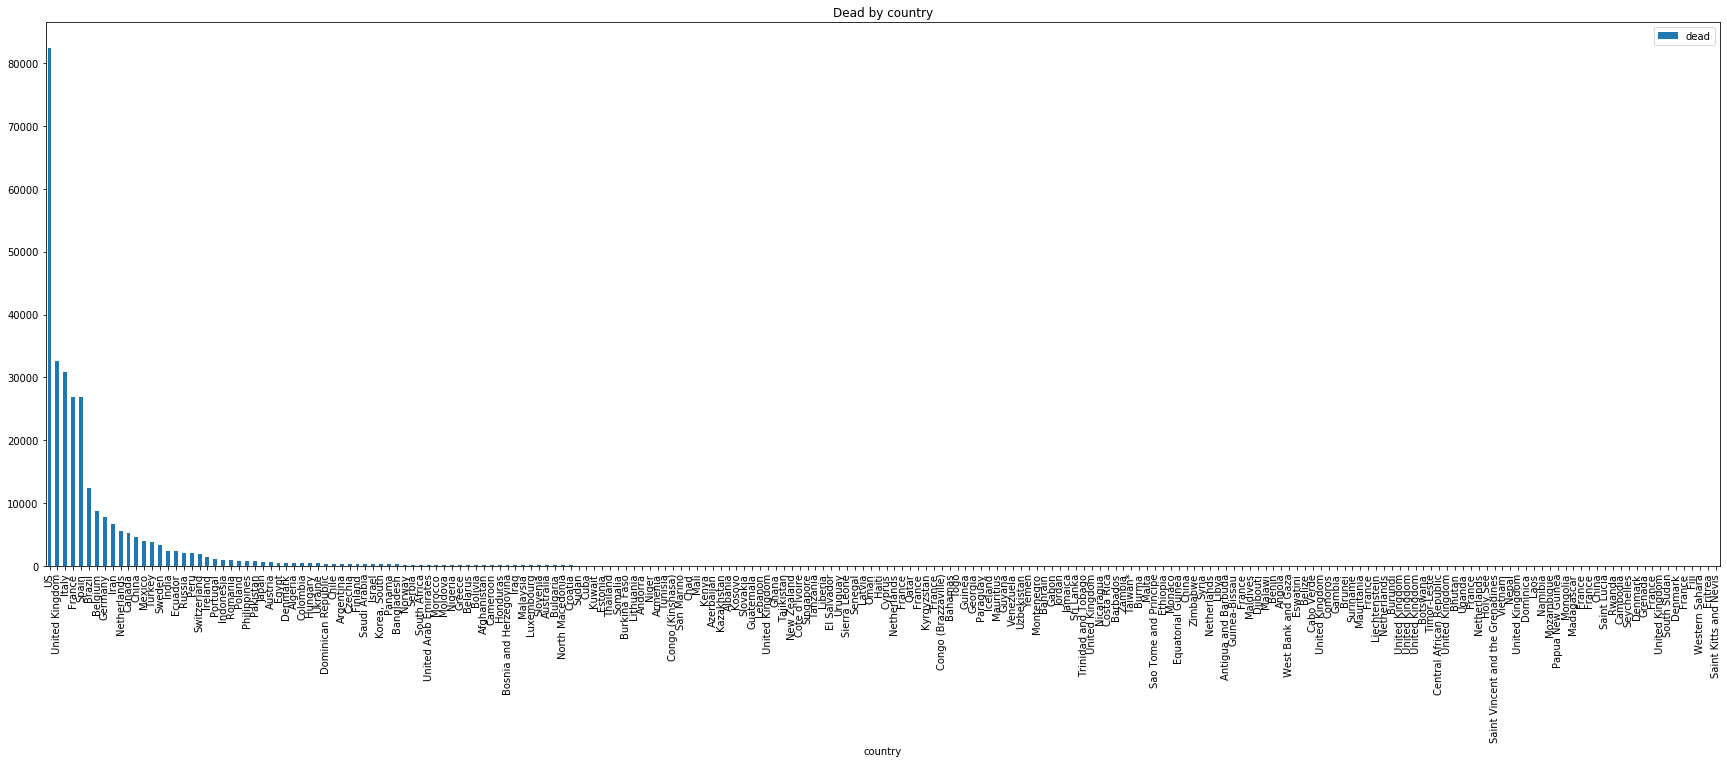

In [63]:
#Plot in using a bar plot
newest.sort_values(by='dead', ascending=False).plot.bar(title='Dead by country', x = 'country', y='dead', figsize=(30,10))

The plot is not looking great but it gives an overview which shows that there are a few countries with a high death count while there are a lot of countries with a death count equal to or close to zero. 

A histogram also gives an overview of the distribution of the data. 

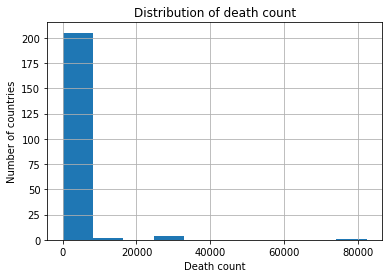

In [64]:
#Plot histogram
ax = newest.hist()
ax[0][0].set_xlabel("Death count")
ax[0][0].set_ylabel("Number of countries")
ax[0][0].set_title('Distribution of death count');

The majority of countries have a very low death count compared to a few others. 

To get a geographical overview of the death count the count is plotted on a world map. For this the deaths dataframe is used where death count is not grouped by country but there are individual counts for some provinces and states.

In [65]:
deaths_df.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,country_code
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,AFG
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,ALB
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,465.0,470.0,476.0,483.0,488.0,494.0,502.0,507.0,515.0,DZA
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,46.0,46.0,47.0,47.0,48.0,48.0,48.0,48.0,AND
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AGO


In [68]:
import folium
import math

#Define helper method to get the country name nicely formatted. 
def getCountry(row):
    #If there is a province/state then include it and the country name in parenthesis
    if isinstance(row['Province/State'], str):
        return str(row['Province/State']) + '('+ row.country+')'
    #If there is not province/state then just retunr the country name
    else:
        return row.country

#Create folium map
world_map = folium.Map([40, 0],tiles = "Stamen Terrain", zoom_start=2)

#Plot death count on map with red dots with a radius corresponding the number of dead
for index,row in deaths_df.iterrows(): 
    #Only plot counts of more than zero
    if (row[deaths_df.columns[-2]] > 0):
        folium.CircleMarker([row.Lat, row.Long],
                        radius=(row[deaths_df.columns[-2]])/1000,
                        popup= getCountry(row) + ' \n'+ str(row[country_total_df.columns[-1]]),
                        fill=True, # Set fill to True
                        fill_color='red',
                        color='red',
                        weight=0.1,
                        fill_opacity=0.6
                        ).add_to(world_map)
world_map

From the map it is evident that the US and Europe are heavily affected.

#### Government Responses dataset

## Data Analysis
Describe your data analysis and explain what you've learned about the dataset.
If relevant, talk about your machine-learning.


## Genre
Which genre of data story did you use?
Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?


## Visualizations
Explain the visualizations you've chosen.
Why are they right for the story you want to tell?


## Discussion
Think critically about your creation

What went well?,

What is still missing? What could be improved?, Why?
Note: Skrive noget om at vi burde have fokuseret lidt mere på data exploration til at starte med i stedet for at springe direkte ud i at prøve at lave de interaktive plots. Så kunne vi måske have fundet noget mere spændende at analysere. 
Note: man kan i fremtiden prøve at uddybe se på sammenhæng hvis man inddeler landene i stater/territorier/ol. og tager populations densiteten med i beregningerne


## Contributions

Who did what?
You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
